## Import libraries

In [1]:
from urllib.parse import urlparse

from arcgis.gis import GIS, Item
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap

## Connect to _source_ and _target_ organizations

In [2]:
source = GIS(profile="clone-starter", verify_cert=False)
target = GIS(profile="clone-terminator", verify_cert=False)

## Clone Webmap: Example #1

### Get a Webmap item from _source_

<Item title:"Liverpool Authority District" type:Web Map owner:clonerator>
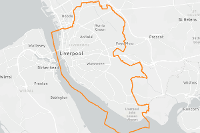

In [3]:
liverpool_bnd = source.content.get("8a0f9a38de4f48cd913b558bbbb77b54")
liverpool_bnd

#### Initialize `WebMap` object to inspect layers

In [4]:
liverpool_wm = WebMap(liverpool_bnd)

#### Print information about `Webmap` layers

In [5]:
for lyr in liverpool_wm.layers:
    print(f"{lyr['title']}\n{'-'*80}\n{' '*2}item id: {lyr['itemId']}\n"
          f"{' '*2}url: {lyr['url']}")

Liverpool_District_Boundary_GBR
--------------------------------------------------------------------------------
  item id: 2702b04a6ba04894a3b00fdc43158910
  url: https://nbs1.dev.geocloud.com/server/rest/services/Hosted/Liverpool_District_Boundary_GBR/FeatureServer/0


#### Search _target_ for layer from _source_ `Webmap` 

In [6]:
target.content.search("LIverpool_District_Boundary_GBR", item_type="Feature Layer")

[]

_Target_ does not contain the layer in this `Webmap`.

### Clone Webmap

In [7]:
wm_clone = target.content.clone_items(items=[liverpool_bnd],
                                      folder="Liverpool District GBR")
wm_clone

[<Item title:"Liverpool_District_Boundary_GBR" type:Feature Layer Collection owner:clonebeliever>,
 <Item title:"Liverpool Authority District" type:Web Map owner:clonebeliever>]

#### Get `Webmap item` from resulting list

<Item title:"Liverpool Authority District" type:Web Map owner:clonebeliever>
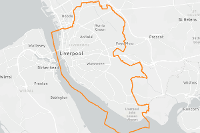

In [8]:
target_liverpool_bnd = wm_clone[1]
target_liverpool_bnd

#### Initialize `Webmap` object to inspect layers

In [9]:
target_liverpool_wm = WebMap(target_liverpool_bnd)

#### Print information about `Webmap` layers

In [10]:
for lyr in target_liverpool_wm.layers:
    print(f"{lyr['title']}\n{'-'*80}\n{' '*2}item id: {lyr['itemId']}\n"
          f"{' '*2}url: {lyr['url']}")

Liverpool_District_Boundary_GBR
--------------------------------------------------------------------------------
  item id: def19135fe144d18b23a04be08a89ea9
  url: https://nbs2.dev.geocloud.com/server/rest/services/Hosted/Liverpool_District_Boundary_GBR/FeatureServer/0


#### Search the _target_ again for the layer from the _source_ `Webmap`

In [11]:
target.content.search("Liverpool_District_Boundary_GBR", item_type="Feature Layer")

[<Item title:"Liverpool_District_Boundary_GBR" type:Feature Layer Collection owner:clonebeliever>]

_Target_ now contains the layer cloned along with the `Webmap`

## Clone Webmap: Example 2

### Get `Webmap item` containing previously cloned layer

<Item title:"Liverpool Historic Buildings GBR" type:Web Map owner:clonerator>
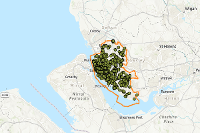

In [12]:
historic_liverpool_bldg = source.content.get("821227e33ff74f8b85d5d650fc124e2f")
historic_liverpool_bldg

#### Initialize `Webmap` object to inpsect layers

In [13]:
historic_liverpool_wm = WebMap(historic_liverpool_bldg)

#### Print infrormation about layers

In [14]:
for lyr in historic_liverpool_wm.layers:
    print(f"{lyr['title']}\n{'-'*80}\n{' '*2}item id: {lyr['itemId']}\n"
          f"{' '*2}url: {lyr['url']}")
    print("\n")

Liverpool_District_Historic_Buildings_GBR
--------------------------------------------------------------------------------
  item id: 58169dc566604ec5815fd89d4e96b77a
  url: https://nbs1.dev.geocloud.com/server/rest/services/Hosted/Liverpool_District_Historic_Buildings_GBR/FeatureServer/0


Liverpool_District_Boundary_GBR
--------------------------------------------------------------------------------
  item id: 2702b04a6ba04894a3b00fdc43158910
  url: https://nbs1.dev.geocloud.com/server/rest/services/Hosted/Liverpool_District_Boundary_GBR/FeatureServer/0




#### Search _target_ for layers from _source_ `Webmap`

In [15]:
target.content.search(query="Liverpool_District_Historic_Buildings_GBR",
                     item_type="Feature Layer")

[]

In [16]:
target.content.search(query="Liverpool_District_Boundary_GBR",
                     item_type="Feature Layer")

[<Item title:"Liverpool_District_Boundary_GBR" type:Feature Layer Collection owner:clonebeliever>]

### Clone `Webmap`

In [17]:
historic_wm_clone = target.content.clone_items(items=[historic_liverpool_bldg],
                                               folder="Liverpool District GBR")
historic_wm_clone

[<Item title:"Liverpool_District_Historic_Buildings_GBR" type:Feature Layer Collection owner:clonebeliever>,
 <Item title:"Liverpool Historic Buildings GBR" type:Web Map owner:clonebeliever>]

#### Get `Webmap item` from resulting list

<Item title:"Liverpool Historic Buildings GBR" type:Web Map owner:clonebeliever>
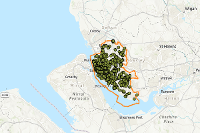

In [18]:
target_historic_bldgs = historic_wm_clone[1]
target_historic_bldgs

#### Initialize `Webmap` object to inspect layers

In [19]:
target_historic_wm = WebMap(target_historic_bldgs)

#### Print information about layers

In [20]:
for lyr in target_historic_wm.layers:
    print(f"{lyr['title']}\n{'-'*80}\n{' '*2}item id: {lyr['itemId']}\n"
          f"{' '*2}url: {lyr['url']}")
    print("\n")

Liverpool_District_Historic_Buildings_GBR
--------------------------------------------------------------------------------
  item id: 095c634b181b4cf9b6bb27101a0c4d82
  url: https://nbs2.dev.geocloud.com/server/rest/services/Hosted/Liverpool_District_Historic_Buildings_GBR/FeatureServer/0


Liverpool_District_Boundary_GBR
--------------------------------------------------------------------------------
  item id: def19135fe144d18b23a04be08a89ea9
  url: https://nbs2.dev.geocloud.com/server/rest/services/Hosted/Liverpool_District_Boundary_GBR/FeatureServer/0




We can see:
 * _target_ `Webmap` layers:
     * have url matching the _target_
     * _target_ `Webmap` layer *Liverpool_District_Boundary_GBR* references `itemId` created in the previous clone operation
     * _target_ `Webmap` layer *Liverpool_District_Historic_Buildings_GBR* references new `itemId` in _target_

#### Search _target_ for layers from _source_ `Webmap`

In [21]:
target.content.search(query="Liverpool_District_Historic_Buildings_GBR",
                     item_type="Feature Layer")

[<Item title:"Liverpool_District_Historic_Buildings_GBR" type:Feature Layer Collection owner:clonebeliever>]

In [22]:
target.content.search(query="Liverpool_District_Boundary_GBR",
                     item_type="Feature Layer")

[<Item title:"Liverpool_District_Boundary_GBR" type:Feature Layer Collection owner:clonebeliever>]